In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Configuration pour un affichage propre
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
import pandas as pd # <--- IL MANQUAIT CETTE LIGNE
from sklearn.preprocessing import StandardScaler

# Chargement (le 'r' devant le chemin évite les erreurs de caractères spéciaux Windows)
path = r"C:\Users\zaidr\Documents\GitHub\HR-360---Le-Cycle-de-Vie-Pr-dictif-de-l-Employ-\HR_Analytics_Structure_Complet.csv"
df = pd.read_csv(path)

# Sélection des variables clés
features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'JobLevel']
X = df[features]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Données prêtes et standardisées.")
print(f"Nombre d'employés chargés : {len(df)}")

Données prêtes et standardisées.
Nombre d'employés chargés : 1470


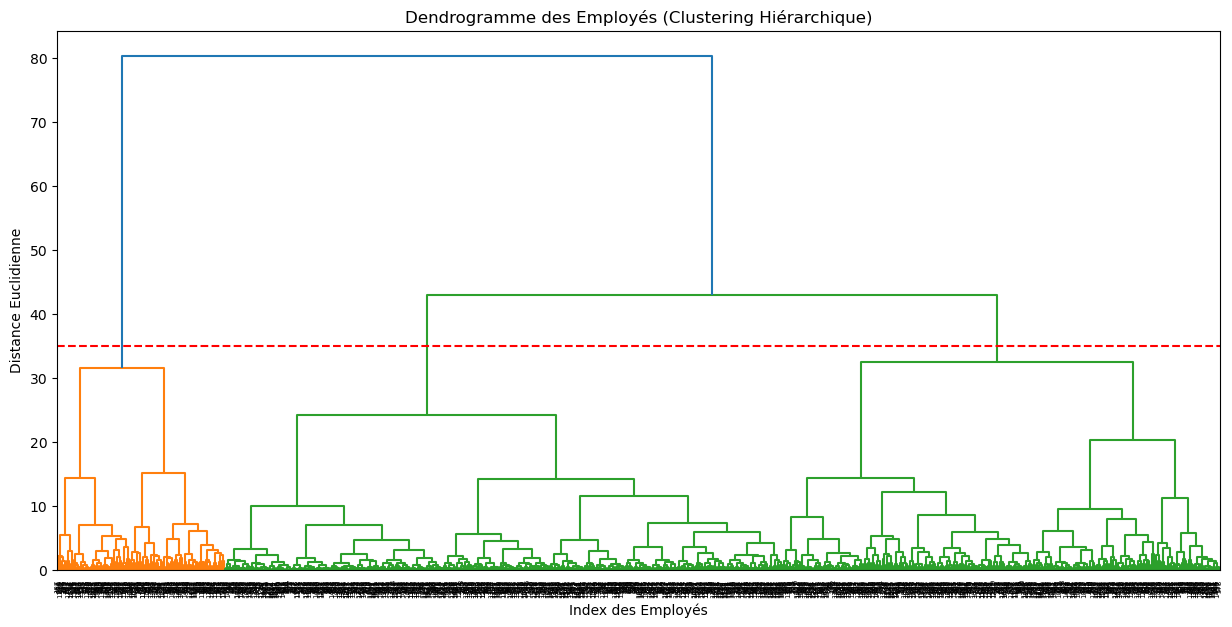

✅ Clustering Hiérarchique terminé et étiquettes ajoutées au tableau.


In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# 1. Création du Dendrogramme
# On utilise la méthode 'ward' qui cherche à créer des groupes les plus homogènes possibles
plt.figure(figsize=(15, 7))
plt.title("Dendrogramme des Employés (Clustering Hiérarchique)")

# On génère l'arbre
Z = sch.linkage(X_scaled, method='ward')
dendrogram = sch.dendrogram(Z)

# On ajoute une ligne horizontale pour visualiser la coupure à 3 clusters
# (La hauteur de la ligne dépend de ton graphique, ajuste le chiffre si besoin)
plt.axhline(y=35, color='r', linestyle='--') 

plt.xlabel('Index des Employés')
plt.ylabel('Distance Euclidienne')
plt.show()

# 2. Application de l'algorithme (Agglomerative Clustering)
# On reste sur 3 clusters pour pouvoir comparer avec le K-Means
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster_Hierarchique'] = hc.fit_predict(X_scaled)

print("✅ Clustering Hiérarchique terminé et étiquettes ajoutées au tableau.")

In [10]:
# --- ÉTAPE 1 : On s'assure que le K-Means est bien calculé ---
from sklearn.cluster import KMeans

# On utilise 3 clusters comme convenu
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# --- ÉTAPE 2 : On s'assure que le Hiérarchique est bien calculé ---
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['Cluster_Hierarchique'] = hc.fit_predict(X_scaled)

# --- ÉTAPE 3 : Maintenant le tableau croisé fonctionnera ---
print("--- Comparaison des deux méthodes ---")
comparaison = pd.crosstab(df['Cluster_KMeans'], df['Cluster_Hierarchique'])
print(comparaison)

--- Comparaison des deux méthodes ---
Cluster_Hierarchique    0    1    2
Cluster_KMeans                     
0                     457   27  158
1                      34  185    0
2                      61    0  548


In [12]:
from sklearn.metrics import silhouette_score

# KPI pour K-Means
score_kmeans = silhouette_score(X_scaled, df['Cluster_KMeans'])

# KPI pour le Clustering Hiérarchique
score_hc = silhouette_score(X_scaled, df['Cluster_Hierarchique'])

print(f"KPI Silhouette - K-Means : {score_kmeans:.3f}")
print(f"KPI Silhouette - Hiérarchique : {score_hc:.3f}")

KPI Silhouette - K-Means : 0.310
KPI Silhouette - Hiérarchique : 0.268


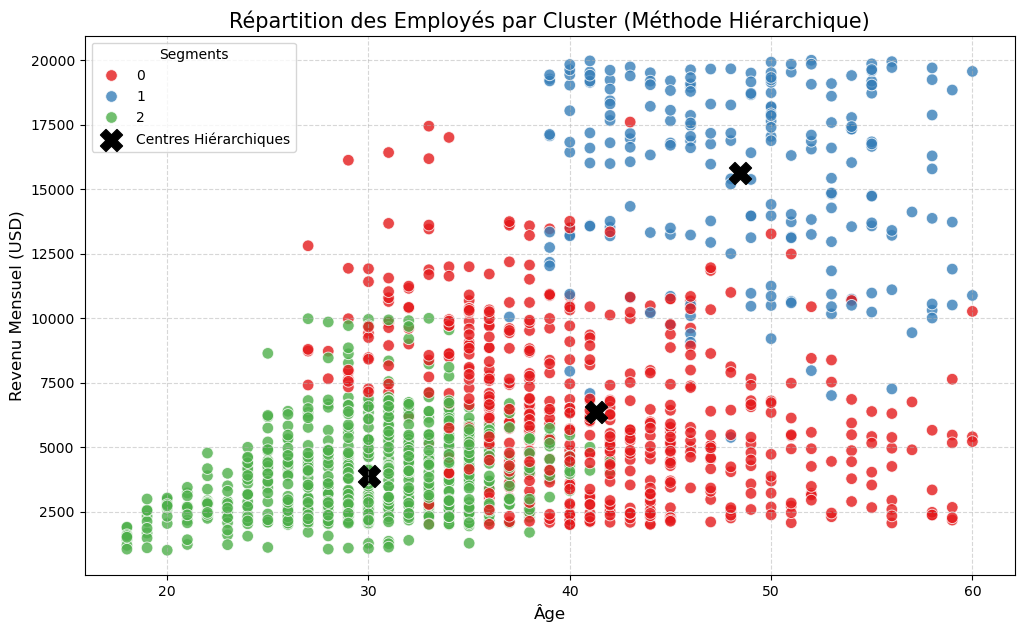

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. On définit la taille du graphique
plt.figure(figsize=(12, 7))

# 2. Création du nuage de points
# On utilise l'Age en X, le Salaire en Y
# 'hue' utilise les étiquettes créées par l'algorithme hiérarchique
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', 
                hue='Cluster_Hierarchique', palette='Set1', 
                s=70, alpha=0.8)

# 3. Calcul et affichage des centres (moyennes) pour chaque cluster hiérarchique
# Note: Le clustering hiérarchique n'a pas de "centroïdes" naturels comme K-Means,
# on les calcule donc manuellement pour la visualisation.
centroids_hc = df.groupby('Cluster_Hierarchique')[['Age', 'MonthlyIncome']].mean()

plt.scatter(centroids_hc['Age'], centroids_hc['MonthlyIncome'], 
            marker='X', s=250, color='black', label='Centres Hiérarchiques')

# 4. Habillage du graphique
plt.title('Répartition des Employés par Cluster (Méthode Hiérarchique)', fontsize=15)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Revenu Mensuel (USD)', fontsize=12)
plt.legend(title='Segments')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()